<a href="https://colab.research.google.com/github/piyuminadee/LangGraph/blob/main/LangGraph_stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 6.7 MB/s eta 0:00:00


Simple Graph

In [2]:
from typing import TypedDict

In [ ]:
# class AgentState(TypedDict):
#   name : str
#   age : int
#   message : str

In [ ]:
# def hello_age(state : AgentState) -> AgentState:
#   state['message'] = f"{state['message']}, You are {state['age']} years old"
#   return state

In [ ]:
# def hello_name(state : AgentState) -> AgentState:
#   state['message'] = f"Hello {state['name']}"
#   return state

In [3]:
from langgraph.graph import StateGraph, START, END

In [ ]:
# workflow = StateGraph(AgentState)
# workflow.add_node("hello_name", hello_name)
# workflow.add_node("hello_age", hello_age)
# workflow.add_edge(START, "hello_name")
# workflow.add_edge("hello_name", "hello_age")
# workflow.add_edge("hello_age", END)
# app = workflow.compile()

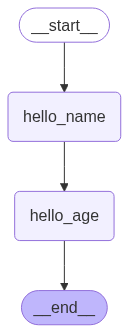

In [ ]:
# from IPython.display import Image, display
# display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"name":"kamal", "age":25})
print(result['message'])

(25, 'kamal')


In [4]:
class AgentState(TypedDict):
  num1 : int
  num2 : int
  operation : str
  result : int

In [5]:
from os import stat
def addition(state:AgentState) -> AgentState:
  state["result"] = state["num1"] + state["num2"]
  return state


In [6]:
def subtraction(state:AgentState) -> AgentState:
  state["result"] = state["num1"] - state["num2"]
  return state

In [7]:
def multiplication(state:AgentState) -> AgentState:
  state["result"] = state["num1"] * state["num2"]
  return state

In [8]:
def division(state:AgentState) -> AgentState:
  state["result"] = state["num1"] / state["num2"]
  return state

In [9]:
def decision_node(state:AgentState) -> AgentState:
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"
  elif state["operation"] == "*":
    return "multiplication_operation"
  elif state["operation"] == "/":
    return "division_operation"

In [13]:
workflow = StateGraph(AgentState)
workflow.add_node("addition", addition)
workflow.add_node("subtraction", subtraction)
workflow.add_node("multiplication", multiplication)
workflow.add_node("division", division)
workflow.add_node("router", lambda state:state)

workflow.add_edge(START, "router")
workflow.add_conditional_edges("router",
                               decision_node,
                               {
                                   "addition_operation":"addition",
                                   "subtraction_operation": "subtraction",
                                   "multiplication_operation":"multiplication",
                                   "division_operation": "division"
                               })
workflow.add_edge("addition", END)
workflow.add_edge("subtraction", END)
workflow.add_edge("multiplication", END)
workflow.add_edge("division", END)
app = workflow.compile()

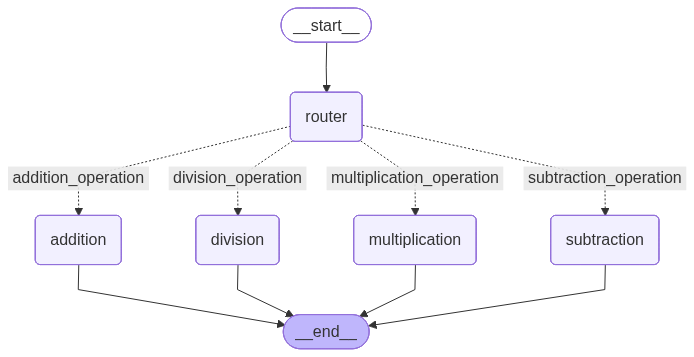

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))